# Big Picture

Hard voting is when you predict the final class label as the class label that has been most frequently predicted by the classificatio nmdoels. Soft voting is when you predict the class labels by averaging the class probabilities. This is only recommended if the classiferes are well-calibrated.

# Get the Data

I picked this dataset because it was clean and relatively easy to manipulate. It is a binary classification dataset so it is easy to work with. Also, there are only 8 features which won't make it too hard to work with. I would like to find out if we can classify correctly whether someone has diabetes based on these certain features such as: Glucose, BloodPressure, Insulin, BMI, and Age

https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


8 Features (columns), the file is 54.1 KB and the classification is 1s and 0s so binary. We can learn that the averages for the features we are looking at which may come handy later on. There are 768 entries. 

# Non-linear Seperation Visualization

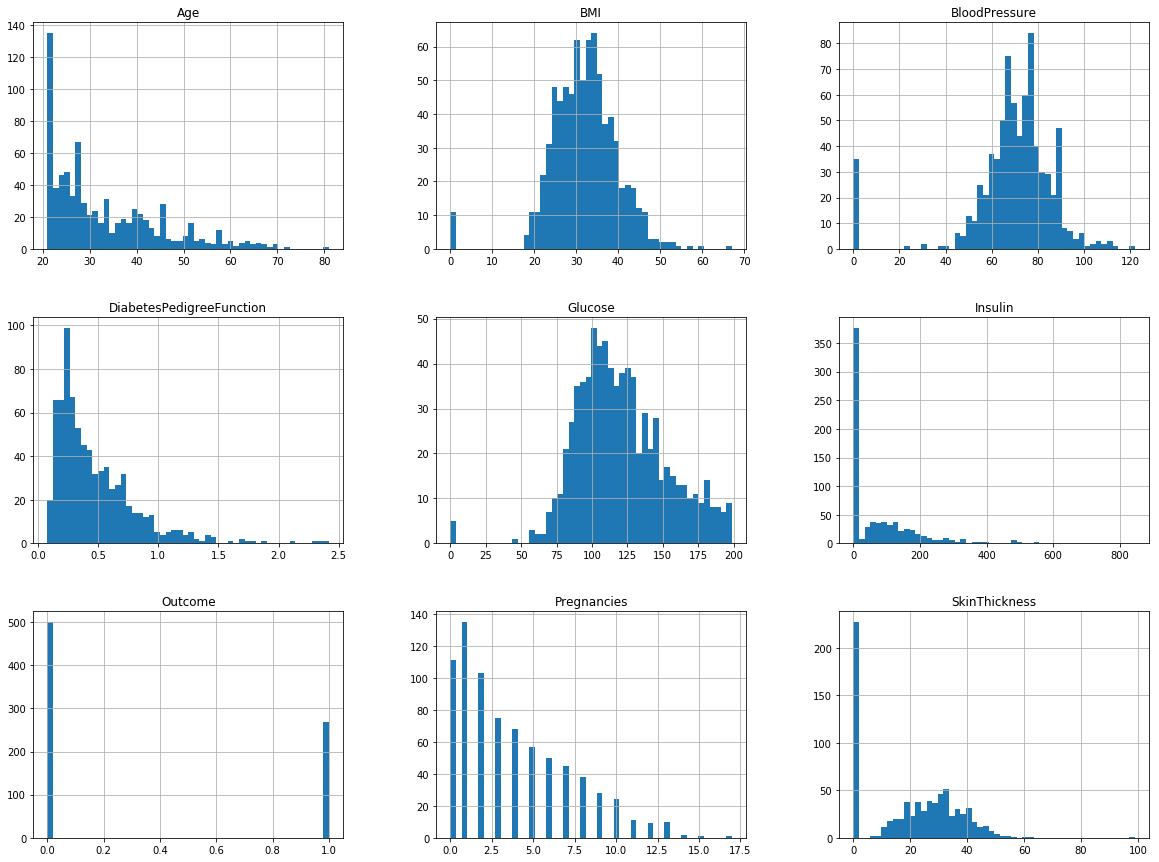

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
plt.show()

# Select a base Classifier

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection

X = data[['Age', 'BMI', 'BloodPressure', 'Glucose', 'Insulin', 'Pregnancies']]
Y = data['Outcome']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [7]:
corr_matrix = data.corr()
corr_matrix["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
data_predictions = lin_reg.predict(X_validation)
print(data_predictions)

[ 0.0441367   0.79594482  0.59575939  0.20380899  0.36687638  0.52202641
  0.08716826  0.34850719  0.79716496  0.13413594  0.69120201  0.19434326
  0.59603209  0.78963871  0.47409087  0.29978431  0.36666921  0.13530502
  0.23394706  0.23955126  0.52623858  0.3312495   0.74527276  0.64257217
  0.2392384   0.26109848  0.0974077   0.46970215  0.34782035  0.27323862
  0.41846688  0.36357043  0.23278111  0.61702639 -0.02456957  0.19025476
  0.35064369  0.25307683  0.61550256  0.71020337  0.56315716  0.66143641
  0.2772413  -0.07056612  0.35430494  0.20070778  0.34485775  0.43358593
  0.53205094  0.76537951  0.27664877  0.17140125  0.37522296  0.02215081
  0.56601058  0.33069525  0.28192146  0.17959589  0.22605463  0.36267376
  0.21755391  0.85613946  0.06795243  0.51478021  0.36137039  0.54326952
  0.25886895  0.59393985  0.73393511  0.49509376  0.71181448  0.73029653
  0.24264212  0.3950007   0.36568249  0.38897227  0.37918155  0.12849576
 -0.0164811   0.16666309  0.12698392  0.31965058  0

In [10]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(Y_validation, data_predictions)

In [11]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.39519794158223803

# Ensemble Classifiers

## Bagging

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, Y_train)
y_pred = bag_clf.predict(X_validation)

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_validation, y_pred))

0.7792207792207793


In [14]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, Y_train)
y_pred_tree = tree_clf.predict(X_validation)
print(accuracy_score(Y_validation, y_pred_tree))

0.6753246753246753


In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(bag_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([0.73786408, 0.75980392, 0.75      ])

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(bag_clf, X_train, Y_train, cv=3)
confusion_matrix(Y_train, y_train_pred)

array([[345,  58],
       [ 96, 115]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score, recall_score
precision_score(Y_train, y_train_pred)

0.6647398843930635

In [18]:
recall_score(Y_train, y_train_pred)

0.5450236966824644

In [19]:
from sklearn.metrics import f1_score
f1_score(Y_train, y_train_pred)

0.5989583333333334

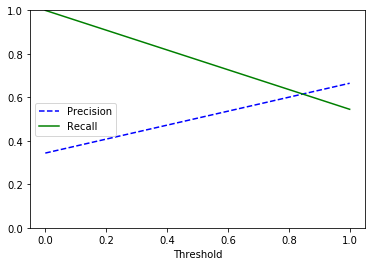

In [20]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(bag_clf, X_train, Y_train, cv=3)
precisions, recalls, thresholds = precision_recall_curve(Y_train, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

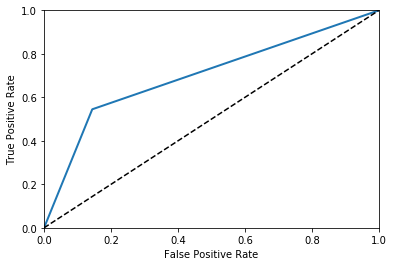

In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train, y_scores)

0.7005515505744828

## Random Forests

In [23]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [24]:
bag_clf.fit(X_train, Y_train)
y_pred = bag_clf.predict(X_validation)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, Y_train)

y_pred_rf = rnd_clf.predict(X_validation)

In [26]:
np.sum(y_pred == y_pred_rf) / len(y_pred) 

0.9415584415584416

## AdaBoost

In [27]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [30]:
ada_clf.predict(X_validation)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(ada_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([0.7184466 , 0.72058824, 0.74509804])

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(ada_clf, X_train, Y_train, cv=3)
confusion_matrix(Y_train, y_train_pred)

array([[332,  71],
       [ 96, 115]], dtype=int64)

In [33]:
from sklearn.metrics import precision_score, recall_score
precision_score(Y_train, y_train_pred)

0.6182795698924731

In [34]:
recall_score(Y_train, y_train_pred)

0.5450236966824644

In [35]:
from sklearn.metrics import f1_score
f1_score(Y_train, y_train_pred)

0.579345088161209

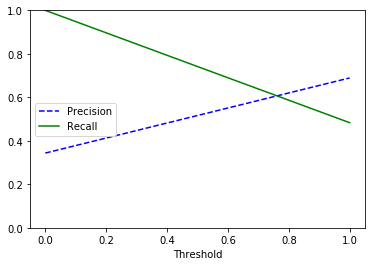

In [36]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(bag_clf, X_train, Y_train, cv=3)
precisions, recalls, thresholds = precision_recall_curve(Y_train, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

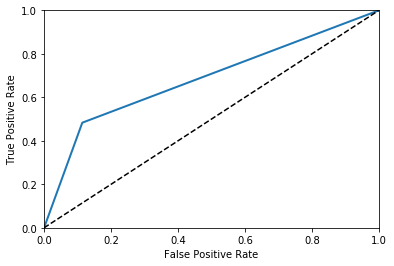

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train, y_scores)

0.684634200839674

# Feature Importance

In [39]:
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [41]:
importances = list(rnd_clf.feature_importances_)

In [43]:
feature_list = list(data.columns)

In [44]:
feature_importances = [(feature, round(importance, 2)) for feature,
                      importance in zip(feature_list, importances)]

In [45]:
feature_importances = sorted(feature_importances, key = lambda x:
                            x[1], reverse = True)

In [46]:
[print('Variable: {:8} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: SkinThickness Importance: 0.32
Variable: Glucose  Importance: 0.2
Variable: Pregnancies Importance: 0.16
Variable: BloodPressure Importance: 0.12
Variable: Insulin  Importance: 0.1
Variable: BMI      Importance: 0.1


[None, None, None, None, None, None]

These stats prove that some variables are much more important to our problem than others. 

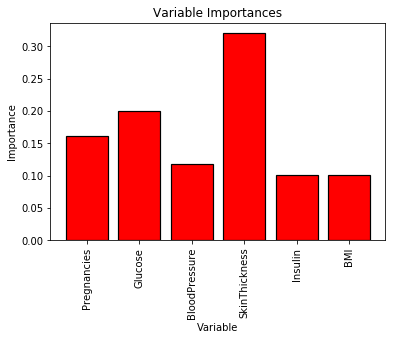

In [47]:
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

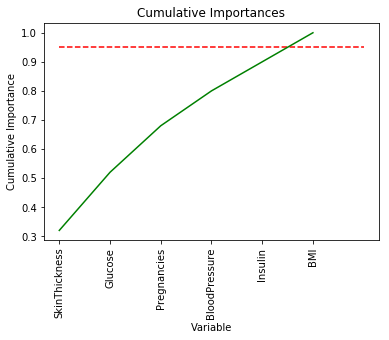

In [48]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

# Solution

As we can see based on the results at hand, using the Bagging classifier is the most accurate classifier for the problem. It had a better ROC score compared to the other classifiers. I think the most important information from our study is the feature importance. We can see that Skin Thickness is the most important feature for us to be able to predict accurately. We can use this to our advantage when looking at weighting each feature, with Skin Thickness the most weighted because of its importance. 

# Future

So for starters we definetly need more data. 768 entries isn't nearly enough to be able to get good measurements and test out the data. We can gether more data by analyzing more patients and there health. The model doesn't work well enough for future purposes because we need to be able to properly diagnose patients with higher than 90% accuracy, where as we are only at around 80. We should continue to work with the Bagging model since it delivered the highest accuracy with least amount of errors. I am not satisfied until I recieve more data, but the good thing is that we know the most important features for this problem. 